# Capstone 2: Data wrangling
<b>PROJECT GOAL</b><br>
The overall goal of this project is to understand and predict a time series on delinquency rate (response variable) for lease contracts originated by U.S. banks.  Time series for several predictor (exogenous) variables will be included in an attempt to identify economic variables (covariates) that may help explain and thus predict future delinquency rates.<br><br>
<b>DATA WRANGLING NOTEBOOK</b><br>
The purpose of this notebook is to:
* load data sets from source files into Python data objects
* standardize date nomenclature and frequency over data sets (lease delinquency is measured quarterly)
* describe the data with simple plots and summary statistics
* join all data into a single data frame, joining on period quarter-end
* store the organized data in Python-native pickle format to facilitate downstream analyses

## 2.1 Import Python Modules

In [554]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## 2.2 Load data from source files

<b>DATA FILES - ECONOMIC SERIES</b>

In [555]:
path_raw_data = '../raw_data/'
#data_label_list = [ 'retsales', 'totbusinv', 'delinq_lease', 'leasercvbl', 'loanstdrd', 'ism_man_pmi', 'conssent' ]
for flnm in os.listdir(path_raw_data):
    if flnm.endswith('.csv'):
        print(flnm)

CENSUS_retsales_sa_20210523.csv
CENSUS_totbusinv_sa_20210523.csv
FRB_CHGDEL_delinq_lease_sa_20210523.csv
FRB_CHGDEL_leasercvbl_20210523.csv
FRB_SLOOS_loanstdrd_20210523.csv
ISM-MAN_ism_man_pmi_20210523.csv
UMICH_conssent_20210523.csv


<b>DELINQUENCY - LEASES - ALL BANKS</b>

In [556]:
df_delinq_lease = pd.DataFrame()
flnm = 'FRB_CHGDEL_delinq_lease_sa_20210523.csv'
df_delinq_lease = pd.read_csv(path_raw_data + flnm,skiprows=5)
df_delinq_lease.head(3)

,Time Period,STFBQDR%STFBAILR_XEOP_MA.Q
0,1987Q1,2.49
1,1987Q2,2.25
2,1987Q3,2.13


<b>LEASE RECEIVABLES - ALL BANKS</b>

In [557]:
df_leasercvbl = pd.DataFrame()
flnm = 'FRB_CHGDEL_leasercvbl_20210523.csv'
df_leasercvbl = pd.read_csv(path_raw_data + flnm,skiprows=5)
df_leasercvbl.head(3)

,Time Period,STFBAILR_XEOP_MA_N.Q
0,1985Q1,20573
1,1985Q2,21443
2,1985Q3,22086


<b>LOAN STANDARDS - ALL BANKS</b>

In [558]:
df_loanstdrd = pd.DataFrame()
flnm = 'FRB_SLOOS_loanstdrd_20210523.csv'
df_loanstdrd = pd.read_csv(path_raw_data + flnm,skiprows=5)
#keep commercial & industrial small business, only
df_loanstdrd.drop(columns=['SUBLPDCILS_N.Q','SUBLPDCLCS_N.Q'],inplace=True)
df_loanstdrd.head(3)

,Time Period,SUBLPDCISS_N.Q
0,1990Q2,52.7
1,1990Q3,33.9
2,1990Q4,40.7


<b>ISM PURCHASING MANAGERS INDEX - MANUFACTURING</b>

In [559]:
df_ism_man_pmi = pd.DataFrame()
flnm = 'ISM-MAN_ism_man_pmi_20210523.csv'
df_ism_man_pmi = pd.read_csv(path_raw_data + flnm,skiprows=0)
df_ism_man_pmi.head(3)

,Date,PMI
0,2021-04-01,60.7
1,2021-03-01,64.7
2,2021-02-01,60.8


<b>TOTAL BUSINESS INVENTORIES</b>

In [560]:
df_totbusinv = pd.DataFrame()
flnm = 'CENSUS_totbusinv_sa_20210523.csv'
df_totbusinv = pd.read_csv(path_raw_data + flnm,skiprows=7)
df_totbusinv.head(3)

,Period,Value
0,Jan-1992,808292.0
1,Feb-1992,809600.0
2,Mar-1992,812725.0


<b>RETAIL SALES</b>

In [561]:
df_retsales = pd.DataFrame()
flnm = 'CENSUS_retsales_sa_20210523.csv'
df_retsales = pd.read_csv(path_raw_data + flnm,skiprows=7)
df_retsales.head(3)

,Period,Value
0,Jan-1992,164095.0
1,Feb-1992,164213.0
2,Mar-1992,163721.0


<b>CONSUMER SENTIMENT</b>

In [562]:
df_consent = pd.DataFrame()
flnm = 'UMICH_conssent_20210523.csv'
df_consent = pd.read_csv(path_raw_data + flnm,skiprows=0)
df_consent.head(3)

,QUARTER,YYYY,ICS_ALL
0,Jan.-Mar.,1960,100.0
1,Apr.-June,1960,93.3
2,Jul.-Sep.,1960,97.2


<b>S&P 500 INDEX PRICE</b>

In [563]:
#one-time download from yahoo.finance, store in *.pkl, then load to dataframe
#import yfinance as yf
#df_sp500 = yf.download(tickers='^GSPC',interval='1d',auto_adjust=True,start='1987-01-01',end='2021-04-30')
#df_sp500.to_pickle('../raw_data/sp500index_daily_20210531.pkl')
df_sp500 = pd.read_pickle('../raw_data/sp500index_daily_20210531.pkl')
df_sp500.drop(columns=['Open','High','Low','Volume'],inplace=True)
df_sp500.head(3)

,Close
Date,
1987-01-02,246.449997
1987-01-05,252.190002
1987-01-06,252.779999


## 2.3 Standardize Data By Quarterly Dates

<b>DELINQUENCY - LEASES - ALL BANKS</b>

In [564]:
#rename columns
#del df_delinq_lease['date_qtr_stg']
df_delinq_lease.columns = ['date_orig', 'delinq']

#create new date by quarter label, sort asc
df_delinq_lease['date_qtr_stg'] = df_delinq_lease['date_orig']
df_delinq_lease.sort_values(by=['date_qtr_stg'],inplace=True,ascending=True)

#view structure
df_delinq_lease.reset_index(drop=True, inplace=True)
print(df_delinq_lease.info())
print(df_delinq_lease.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_orig     137 non-null    object 
 1   delinq        137 non-null    float64
 2   date_qtr_stg  137 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.3+ KB
None
  date_orig  delinq date_qtr_stg
0    1987Q1    2.49       1987Q1
1    1987Q2    2.25       1987Q2
2    1987Q3    2.13       1987Q3
3    1987Q4    1.88       1987Q4
4    1988Q1    1.79       1988Q1
5    1988Q2    1.73       1988Q2


<b>LEASE RECEIVABLES - ALL BANKS</b>

In [565]:
#rename columns
#del df_leasercvbl['date_qtr_stg']
df_leasercvbl.columns = ['date_orig', 'ls_rcvbl']

#create new date by quarter label, sort asc
df_leasercvbl['date_qtr_stg'] = df_leasercvbl['date_orig']
df_leasercvbl.sort_values(by=['date_qtr_stg'],inplace=True,ascending=True)

#view structure
df_leasercvbl.reset_index(drop=True, inplace=True)
print(df_leasercvbl.info())
print(df_leasercvbl.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_orig     145 non-null    object
 1   ls_rcvbl      145 non-null    int64 
 2   date_qtr_stg  145 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.5+ KB
None
  date_orig  ls_rcvbl date_qtr_stg
0    1985Q1     20573       1985Q1
1    1985Q2     21443       1985Q2
2    1985Q3     22086       1985Q3
3    1985Q4     24305       1985Q4
4    1986Q1     24752       1986Q1
5    1986Q2     24983       1986Q2


<b>LOAN STANDARDS - ALL BANKS</b>

In [566]:
#rename columns
#del df_loanstdrd['date_qtr_stg']
df_loanstdrd.columns = ['date_orig', 'stdtght_ci_smll_netpct']

#create new date by quarter label, sort asc
df_loanstdrd['date_qtr_stg'] = df_loanstdrd['date_orig'] 
df_loanstdrd.sort_values(by=['date_qtr_stg'],inplace=True,ascending=True)

#view structure
df_loanstdrd.reset_index(drop=True, inplace=True)
print(df_loanstdrd.info())
print(df_loanstdrd.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_orig               125 non-null    object 
 1   stdtght_ci_smll_netpct  125 non-null    float64
 2   date_qtr_stg            125 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.1+ KB
None
  date_orig  stdtght_ci_smll_netpct date_qtr_stg
0    1990Q2                    52.7       1990Q2
1    1990Q3                    33.9       1990Q3
2    1990Q4                    40.7       1990Q4
3    1991Q1                    31.6       1991Q1
4    1991Q2                     6.9       1991Q2
5    1991Q3                     8.8       1991Q3


<b>ISM PURCHASING MANAGERS INDEX - MANUFACTURING</b>

In [567]:
#rename columns
#del df_ism_man_pmi['date_qtr_stg']
df_ism_man_pmi.columns = ['date_orig', 'pmi_man']
#df_ism_man_pmi_bkp = df_ism_man_pmi

#get the quarter-end dates mm in {04,07,10,01}, drop remaining
is_qtr01_end = (df_ism_man_pmi['date_orig'].str[5:7] == '04')
is_qtr02_end = (df_ism_man_pmi['date_orig'].str[5:7] == '07')
is_qtr03_end = (df_ism_man_pmi['date_orig'].str[5:7] == '10')
is_qtr04_end = (df_ism_man_pmi['date_orig'].str[5:7] == '01')
df_ism_man_pmi = df_ism_man_pmi[is_qtr01_end | is_qtr02_end | is_qtr03_end | is_qtr04_end]

#create new date by quarter label, sort asc
df_ism_man_pmi.loc[is_qtr01_end,'date_qtr_stg'] = df_ism_man_pmi.loc[is_qtr01_end,'date_orig'].str[:4] + 'Q1'
df_ism_man_pmi.loc[is_qtr02_end,'date_qtr_stg'] = df_ism_man_pmi.loc[is_qtr02_end,'date_orig'].str[:4] + 'Q2'
df_ism_man_pmi.loc[is_qtr03_end,'date_qtr_stg'] = df_ism_man_pmi.loc[is_qtr03_end,'date_orig'].str[:4] + 'Q3'
df_ism_man_pmi.loc[is_qtr04_end,'date_qtr_stg'] = (df_ism_man_pmi.loc[is_qtr04_end,'date_orig'].str[:4].astype(int) - 1).astype(str) + 'Q4'
df_ism_man_pmi.sort_values(by=['date_qtr_stg'],inplace=True,ascending=True)

#view structure
df_ism_man_pmi.reset_index(drop=True, inplace=True)
print(df_ism_man_pmi.info())
print(df_ism_man_pmi.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_orig     294 non-null    object 
 1   pmi_man       294 non-null    float64
 2   date_qtr_stg  294 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.0+ KB
None
    date_orig  pmi_man date_qtr_stg
0  1948-01-01     51.7       1947Q4
1  1948-04-01     45.4       1948Q1
2  1948-07-01     48.4       1948Q2
3  1948-10-01     47.2       1948Q3
4  1949-01-01     32.9       1948Q4
5  1949-04-01     35.5       1949Q1


<b>TOTAL BUSINESS INVENTORIES</b>

In [568]:
#rename columns
#del df_totbusinv['date_qtr_stg']
df_totbusinv.columns = ['date_orig', 'tot_bus_inv']
#df_totbusinv_bkp = df_totbusinv

#get the quarter-end dates mmm in {Mar,Jun,Sep,Dec}, drop remaining
is_qtr01_end = (df_totbusinv['date_orig'].str[0:3] == 'Mar')
is_qtr02_end = (df_totbusinv['date_orig'].str[0:3] == 'Jun')
is_qtr03_end = (df_totbusinv['date_orig'].str[0:3] == 'Sep')
is_qtr04_end = (df_totbusinv['date_orig'].str[0:3] == 'Dec')
df_totbusinv = df_totbusinv[is_qtr01_end | is_qtr02_end | is_qtr03_end | is_qtr04_end]

#create new date by quarter label, sort asc
df_totbusinv.loc[is_qtr01_end,'date_qtr_stg'] = df_totbusinv.loc[is_qtr01_end,'date_orig'].str[4:8] + 'Q1'
df_totbusinv.loc[is_qtr02_end,'date_qtr_stg'] = df_totbusinv.loc[is_qtr02_end,'date_orig'].str[4:8] + 'Q2'
df_totbusinv.loc[is_qtr03_end,'date_qtr_stg'] = df_totbusinv.loc[is_qtr03_end,'date_orig'].str[4:8] + 'Q3'
df_totbusinv.loc[is_qtr04_end,'date_qtr_stg'] = df_totbusinv.loc[is_qtr04_end,'date_orig'].str[4:8] + 'Q4'
df_totbusinv.sort_values(by=['date_qtr_stg'],inplace=True,ascending=True)

#view structure
df_totbusinv.reset_index(drop=True, inplace=True)
print(df_totbusinv.info())
print(df_totbusinv.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_orig     120 non-null    object 
 1   tot_bus_inv   117 non-null    float64
 2   date_qtr_stg  120 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.9+ KB
None
  date_orig  tot_bus_inv date_qtr_stg
0  Mar-1992     812725.0       1992Q1
1  Jun-1992     820447.0       1992Q2
2  Sep-1992     827513.0       1992Q3
3  Dec-1992     835800.0       1992Q4
4  Mar-1993     844806.0       1993Q1
5  Jun-1993     849135.0       1993Q2


<b>RETAIL SALES</b>

In [569]:
#rename columns
#del df_retsales['date_qtr_stg']
df_retsales.columns = ['date_orig', 'ret_sales']
#df_retsales_bkp = df_retsales

#get the quarter-end dates mmm in {Mar,Jun,Sep,Dec}, drop remaining
is_qtr01_end = (df_retsales['date_orig'].str[0:3] == 'Mar')
is_qtr02_end = (df_retsales['date_orig'].str[0:3] == 'Jun')
is_qtr03_end = (df_retsales['date_orig'].str[0:3] == 'Sep')
is_qtr04_end = (df_retsales['date_orig'].str[0:3] == 'Dec')
df_retsales = df_retsales[is_qtr01_end | is_qtr02_end | is_qtr03_end | is_qtr04_end]

#create new date by quarter label, sort asc
df_retsales.loc[is_qtr01_end,'date_qtr_stg'] = df_retsales.loc[is_qtr01_end,'date_orig'].str[4:8] + 'Q1'
df_retsales.loc[is_qtr02_end,'date_qtr_stg'] = df_retsales.loc[is_qtr02_end,'date_orig'].str[4:8] + 'Q2'
df_retsales.loc[is_qtr03_end,'date_qtr_stg'] = df_retsales.loc[is_qtr03_end,'date_orig'].str[4:8] + 'Q3'
df_retsales.loc[is_qtr04_end,'date_qtr_stg'] = df_retsales.loc[is_qtr04_end,'date_orig'].str[4:8] + 'Q4'
df_retsales.sort_values(by=['date_qtr_stg'],inplace=True,ascending=True)

#view structure
df_retsales.reset_index(drop=True, inplace=True)
print(df_retsales.info())
print(df_retsales.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_orig     120 non-null    object 
 1   ret_sales     117 non-null    float64
 2   date_qtr_stg  120 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.9+ KB
None
  date_orig  ret_sales date_qtr_stg
0  Mar-1992   163721.0       1992Q1
1  Jun-1992   166077.0       1992Q2
2  Sep-1992   169400.0       1992Q3
3  Dec-1992   173105.0       1992Q4
4  Mar-1993   172306.0       1993Q1
5  Jun-1993   178157.0       1993Q2


<b>CONSUMER SENTIMENT</b>

In [570]:
#rename columns
#del df_consent['date_qtr_stg']
df_consent.columns = ['qtr_orig', 'year_orig', 'cons_sent']
#df_consent_bkp = df_consent

#get the quarter-end dates mmm in {Mar,Jun,Sep,Dec}, drop remaining
is_qtr01_end = (df_consent['qtr_orig'].str[5:8] == 'Mar')
is_qtr02_end = (df_consent['qtr_orig'].str[5:8] == 'Jun')
is_qtr03_end = (df_consent['qtr_orig'].str[5:8] == 'Sep')
is_qtr04_end = (df_consent['qtr_orig'].str[5:8] == 'Dec')
df_consent = df_consent[is_qtr01_end | is_qtr02_end | is_qtr03_end | is_qtr04_end]

#create new date by quarter label, sort asc
df_consent.loc[is_qtr01_end,'date_qtr_stg'] = df_consent.loc[is_qtr01_end,'year_orig'].apply(str) + 'Q1'
df_consent.loc[is_qtr02_end,'date_qtr_stg'] = df_consent.loc[is_qtr02_end,'year_orig'].apply(str) + 'Q2'
df_consent.loc[is_qtr03_end,'date_qtr_stg'] = df_consent.loc[is_qtr03_end,'year_orig'].apply(str) + 'Q3'
df_consent.loc[is_qtr04_end,'date_qtr_stg'] = df_consent.loc[is_qtr04_end,'year_orig'].apply(str) + 'Q4'
df_consent.sort_values(by=['date_qtr_stg'],inplace=True,ascending=True)

#view structure
df_consent.reset_index(drop=True, inplace=True)
print(df_consent.info())
print(df_consent.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   qtr_orig      245 non-null    object 
 1   year_orig     245 non-null    int64  
 2   cons_sent     245 non-null    float64
 3   date_qtr_stg  245 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.8+ KB
None
    qtr_orig  year_orig  cons_sent date_qtr_stg
0  Jan.-Mar.       1960      100.0       1960Q1
1  Apr.-June       1960       93.3       1960Q2
2  Jul.-Sep.       1960       97.2       1960Q3
3  Oct.-Dec.       1960       90.1       1960Q4
4  Jan.-Mar.       1961       91.6       1961Q1
5  Apr.-June       1961       92.5       1961Q2


<b>S&P 500 INDEX PRICE</b>

In [571]:
#rename columns
#df_sp500_bkp = df_sp500
#df_sp500 = df_sp500_bkp
df_sp500['date'] = df_sp500.index
df_sp500.columns = ['close_price','date']

#get the last-day-in-month dates, then quarter-end dates mm in {03,06,09,12}, drop remaining
is_month_end = df_sp500['date'] == df_sp500.groupby([df_sp500.index.year,df_sp500.index.month])['date'].transform(max)
is_qtr01_end = (df_sp500['date'].dt.month == 3)
is_qtr02_end = (df_sp500['date'].dt.month == 6)
is_qtr03_end = (df_sp500['date'].dt.month == 9)
is_qtr04_end = (df_sp500['date'].dt.month == 12)
df_sp500 = df_sp500[is_month_end & (is_qtr01_end | is_qtr02_end | is_qtr03_end | is_qtr04_end)]

#create new date by quarter label, sort asc
df_sp500.loc[is_qtr01_end,'date_qtr_stg'] = df_sp500.loc[is_qtr01_end,'date'].dt.strftime('%Y') + 'Q1'
df_sp500.loc[is_qtr02_end,'date_qtr_stg'] = df_sp500.loc[is_qtr02_end,'date'].dt.strftime('%Y') + 'Q2'
df_sp500.loc[is_qtr03_end,'date_qtr_stg'] = df_sp500.loc[is_qtr03_end,'date'].dt.strftime('%Y') + 'Q3'
df_sp500.loc[is_qtr04_end,'date_qtr_stg'] = df_sp500.loc[is_qtr04_end,'date'].dt.strftime('%Y') + 'Q4'
df_sp500.sort_values(by=['date_qtr_stg'],inplace=True,ascending=True)

#view structure
df_sp500.reset_index(drop=True, inplace=True)
print(df_sp500.info())
print(df_sp500.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   close_price   137 non-null    float64       
 1   date          137 non-null    datetime64[ns]
 2   date_qtr_stg  137 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.3+ KB
None
   close_price       date date_qtr_stg
0   291.700012 1987-03-31       1987Q1
1   304.000000 1987-06-30       1987Q2
2   321.829987 1987-09-30       1987Q3
3   247.080002 1987-12-31       1987Q4
4   258.890015 1988-03-31       1988Q1
5   273.500000 1988-06-30       1988Q2


## 2.3 Initial Description of the Data

<b>PLOTS OF SERIES BY QUARTER<b>

<AxesSubplot:xlabel='date_qtr_stg'>

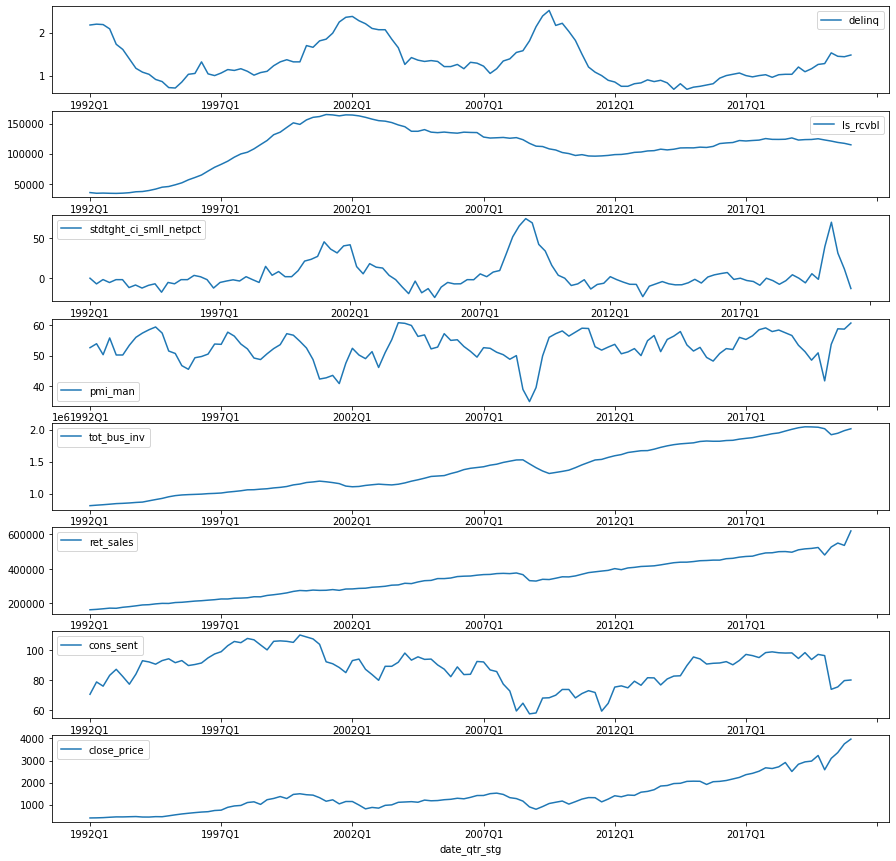

In [572]:
# plot >= 1987Q1 (first deliquency data point)
date_qtr_start = '1992Q1'
fig, axes = plt.subplots(nrows=8,ncols=1,figsize=(15,15))

df_delinq_lease.loc[df_delinq_lease['date_qtr_stg'] >= date_qtr_start].plot(ax=axes[0],y='delinq',x='date_qtr_stg',kind='line')
df_leasercvbl.loc[df_leasercvbl['date_qtr_stg'] >= date_qtr_start].plot(ax=axes[1],y='ls_rcvbl',x='date_qtr_stg',kind='line')
df_loanstdrd.loc[df_loanstdrd['date_qtr_stg'] >= date_qtr_start].plot(ax=axes[2],y='stdtght_ci_smll_netpct',x='date_qtr_stg',kind='line')
df_ism_man_pmi.loc[df_ism_man_pmi['date_qtr_stg'] >= date_qtr_start].plot(ax=axes[3],y='pmi_man',x='date_qtr_stg',kind='line')
df_totbusinv.loc[df_totbusinv['date_qtr_stg'] >= date_qtr_start].plot(ax=axes[4],y='tot_bus_inv',x='date_qtr_stg',kind='line')
df_retsales.loc[df_retsales['date_qtr_stg'] >= date_qtr_start].plot(ax=axes[5],y='ret_sales',x='date_qtr_stg',kind='line')
df_consent.loc[df_consent['date_qtr_stg'] >= date_qtr_start].plot(ax=axes[6],y='cons_sent',x='date_qtr_stg',kind='line')
df_sp500.loc[df_sp500['date_qtr_stg'] >= date_qtr_start].plot(ax=axes[7],y='close_price',x='date_qtr_stg',kind='line')

<b>DESCRIPTIVE STATISTICS<b>

In [573]:
print('DELINQUENCY - LEASES - ALL BANKS')
print('Missing data:',df_delinq_lease[df_delinq_lease['delinq'].isna()]['delinq'].count())
print('First Date:',df_delinq_lease['date_qtr_stg'].min(),'Last Date:',df_delinq_lease['date_qtr_stg'].max())
print('Summary Statistics:\n',df_delinq_lease.describe(),'\n')

print('LEASE RECEIVABLES - ALL BANKS')
print('Missing data:',df_leasercvbl[df_leasercvbl['ls_rcvbl'].isna()]['ls_rcvbl'].count())
print('First Date:',df_leasercvbl['date_qtr_stg'].min(),'Last Date:',df_leasercvbl['date_qtr_stg'].max())
print('Summary Statistics:\n',df_leasercvbl.describe(),'\n')

print('LOAN STANDARDS - ALL BANKS')
print('Missing data:',df_loanstdrd[df_loanstdrd['stdtght_ci_smll_netpct'].isna()]['stdtght_ci_smll_netpct'].count())
print('First Date:',df_loanstdrd['date_qtr_stg'].min(),'Last Date:',df_loanstdrd['date_qtr_stg'].max())
print('Summary Statistics:\n',df_loanstdrd.describe(),'\n')

print('ISM PURCHASING MANAGERS INDEX - MANUFACTURING')
print('Missing data:',df_ism_man_pmi[df_ism_man_pmi['pmi_man'].isna()]['pmi_man'].count())
print('First Date:',df_ism_man_pmi['date_qtr_stg'].min(),'Last Date:',df_ism_man_pmi['date_qtr_stg'].max())
print('Summary Statistics:\n',df_ism_man_pmi.describe(),'\n')

print('TOTAL BUSINESS INVENTORIES')
print('Missing data:',df_totbusinv[df_totbusinv['tot_bus_inv'].isna()]['tot_bus_inv'].count())
print('First Date:',df_totbusinv['date_qtr_stg'].min(),'Last Date:',df_totbusinv['date_qtr_stg'].max())
print('Summary Statistics:\n',df_totbusinv.describe(),'\n')

print('RETAIL SALES')
print('Missing data:',df_retsales[df_retsales['ret_sales'].isna()]['ret_sales'].count())
print('First Date:',df_retsales['date_qtr_stg'].min(),'Last Date:',df_retsales['date_qtr_stg'].max())
print('Summary Statistics:\n',df_retsales.describe(),'\n')

print('CONSUMER SENTIMENT')
print('Missing data:',df_consent[df_consent['cons_sent'].isna()]['cons_sent'].count())
print('First Date:',df_consent['date_qtr_stg'].min(),'Last Date:',df_consent['date_qtr_stg'].max())
print('Summary Statistics:\n',df_consent.describe(),'\n')

print('S&P 500 INDEX PRICE')
print('Missing data:',df_sp500[df_sp500['close_price'].isna()]['close_price'].count())
print('First Date:',df_sp500['date_qtr_stg'].min(),'Last Date:',df_sp500['date_qtr_stg'].max())
print('Summary Statistics:\n',df_sp500.describe(),'\n')

DELINQUENCY - LEASES - ALL BANKS
Missing data: 0
First Date: 1987Q1 Last Date: 2021Q1
Summary Statistics:
            delinq
count  137.000000
mean     1.437664
std      0.522992
min      0.680000
25%      1.030000
50%      1.320000
75%      1.840000
max      2.750000 

LEASE RECEIVABLES - ALL BANKS
Missing data: 0
First Date: 1985Q1 Last Date: 2021Q1
Summary Statistics:
             ls_rcvbl
count     145.000000
mean    95334.358621
std     44618.106683
min     20573.000000
25%     38015.000000
50%    108119.000000
75%    126205.000000
max    164819.000000 

LOAN STANDARDS - ALL BANKS
Missing data: 0
First Date: 1990Q2 Last Date: 2021Q2
Summary Statistics:
        stdtght_ci_smll_netpct
count               125.00000
mean                  5.59840
std                  19.68556
min                 -24.10000
25%                  -7.00000
50%                  -1.70000
75%                   8.80000
max                  74.50000 

ISM PURCHASING MANAGERS INDEX - MANUFACTURING
Missing data: 0

## 2.4 Merge, Store Data in Python-native File

<b>MERGE DATA BY JOINING ON QUARTER-END DATE<b>

In [574]:
df_delinq_merged = pd.DataFrame()
df_delinq_merged['date_qtr_stg'] = df_delinq_lease.loc[:,'date_qtr_stg']
df_delinq_merged['date_qtr'] = pd.to_datetime(df_delinq_merged['date_qtr_stg']).dt.to_period('Q')
#df_delinq_merged['date_qtr'] = pd.to_datetime(df_delinq_merged['date_qtr_stg'],format='%Y-0%q')

#lease deliquency
df_delinq_merged = pd.merge(df_delinq_merged, df_delinq_lease[['date_qtr_stg','delinq']], on=['date_qtr_stg'], how='left')
#lease receivable
df_delinq_merged = pd.merge(df_delinq_merged, df_leasercvbl[['date_qtr_stg','ls_rcvbl']], on=['date_qtr_stg'], how='left')
#loan standards
df_delinq_merged = pd.merge(df_delinq_merged, df_loanstdrd[['date_qtr_stg','stdtght_ci_smll_netpct']], on=['date_qtr_stg'], how='left')
#ism pmi
df_delinq_merged = pd.merge(df_delinq_merged, df_ism_man_pmi[['date_qtr_stg','pmi_man']], on=['date_qtr_stg'], how='left')
#business inventories
df_delinq_merged = pd.merge(df_delinq_merged, df_totbusinv[['date_qtr_stg','tot_bus_inv']], on=['date_qtr_stg'], how='left')
#retail sales
df_delinq_merged = pd.merge(df_delinq_merged, df_retsales[['date_qtr_stg','ret_sales']], on=['date_qtr_stg'], how='left')
#consumer sentiment
df_delinq_merged = pd.merge(df_delinq_merged, df_consent[['date_qtr_stg','cons_sent']], on=['date_qtr_stg'], how='left')
#s&p 500 price index
df_delinq_merged = pd.merge(df_delinq_merged, df_sp500[['date_qtr_stg','close_price']], on=['date_qtr_stg'], how='left')

print(df_delinq_merged.head())
print(df_delinq_merged.tail())

  date_qtr_stg date_qtr  delinq  ls_rcvbl  stdtght_ci_smll_netpct  pmi_man  \
0       1987Q1   1987Q1    2.49     27783                     NaN     55.5   
1       1987Q2   1987Q2    2.25     28299                     NaN     57.5   
2       1987Q3   1987Q3    2.13     28825                     NaN     60.7   
3       1987Q4   1987Q4    1.88     31086                     NaN     57.5   
4       1988Q1   1988Q1    1.79     31225                     NaN     55.8   

   tot_bus_inv  ret_sales  cons_sent  close_price  
0          NaN        NaN       90.5   291.700012  
1          NaN        NaN       91.8   304.000000  
2          NaN        NaN       93.9   321.829987  
3          NaN        NaN       86.4   247.080002  
4          NaN        NaN       92.3   258.890015  
    date_qtr_stg date_qtr  delinq  ls_rcvbl  stdtght_ci_smll_netpct  pmi_man  \
132       2020Q1   2020Q1    1.28    122808                    -1.4     41.7   
133       2020Q2   2020Q2    1.53    120977                

<b>SAVE DATA TO PYTHON-NATIVE PICKLE FILE<b>

In [575]:
df_delinq_merged.to_pickle('../raw_data/df_delinq_merged.pkl')